In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [4]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01242019')

(720, 23)


In [5]:
data.iloc[0]

beta_hats              [[0.0, 0.8647109864095546, 0.0, 0.0, 0.0, 3.59...
betadist                                                         uniform
betas                  [[0.0, 0.0, 0.0, 0.0, 0.0, 4.646638401178853, ...
block_size                                                            60
cov_params                                                    {'L': 0.2}
cov_type                                                         falloff
est_score                                                             r2
exp_type                                                        UoILasso
fn                     [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...
fp                     [7.0, 7.0, 5.0, 4.0, 8.0, 11.0, 4.0, 4.0, 4.0,...
kappa                                                                0.3
l1_ratios                      [0.1, 0.2, 0.5, 0.75, 0.9, 0.95, 0.99, 1]
n_alphas                                                              48
n_boots_est                                        

In [7]:
dat_r2 = data.loc[data['est_score'] == 'r2']

In [10]:
uoil = dat_r2.loc[dat_r2['exp_type'] == 'UoILasso']
uoien = dat_r2.loc[dat_r2['exp_type'] == 'UoIElasticNet']

In [11]:
# Make separate plots for each sparsity, plot as a function of falloff distance

# Select the relevant data:
dat_uoil = []
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.2)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.4)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.6)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.8)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 1)])

# Select the relevant data:
dat_uoien = []
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.2)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.4)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.6)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.8)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 1)])

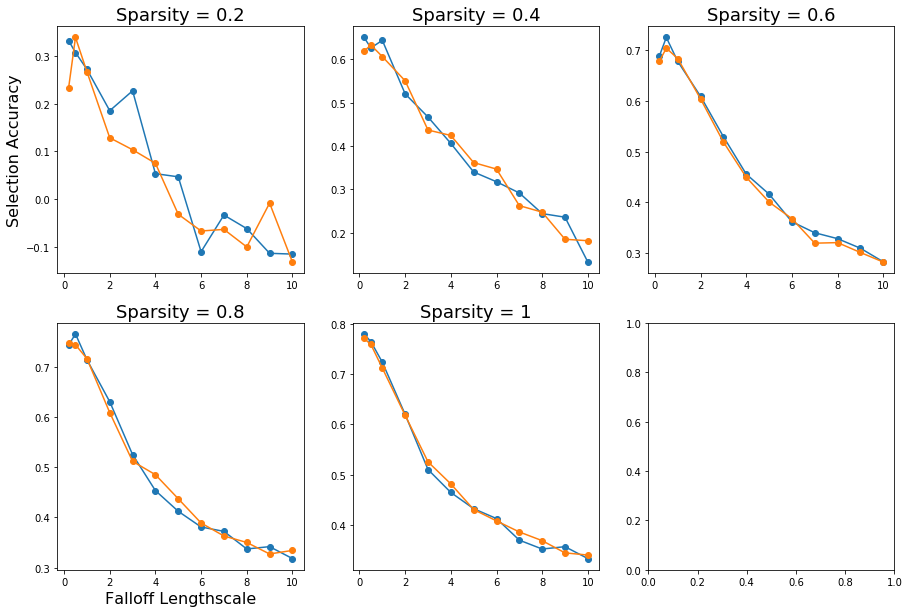

In [15]:
L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(dat_uoil)):
    dd1 = dat_uoil[i]
    dd2 = dat_uoien[i]

    d1 = dd1[dd1['stability_selection'] == 0.7]
    d2 = dd2[dd2['stability_selection'] == 0.7]
    
    nonzero_beta = int(sparsity[i] * 60)

    fn_avg_uoil = np.array([np.mean(d1.iloc[j].fn) for j in range(len(L))])
    fn_avg_uoien = np.array([np.mean(d2.iloc[j].fn) for j in range(len(L))])
    
    fp_avg_uoil = np.array([np.mean(d1.iloc[j].fp) for j in range(len(L))])
    fp_avg_uoien = np.array([np.mean(d2.iloc[j].fp) for j in range(len(L))])
        
    sa_avg_uoil = 1 - np.divide((fn_avg_uoil + fp_avg_uoil), nonzero_beta)
    sa_avg_uoien = 1 - np.divide((fn_avg_uoien + fp_avg_uoien), nonzero_beta)
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(L, sa_avg_uoil, '-o')
    a.plot(L, sa_avg_uoien, '-o')
    
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('Selection Accuracy', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso', 'UoI_ElasticNet'], loc = 'upper right', bbox_to_anchor=(1.75, 1))

In [19]:
# Load data of block correlations
dat_uoil = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01102019', old_format = True)
dat_uoilen = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01132019b', old_format = True)
dat_en = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01142019b', old_format = True)

(120, 16)
(120, 16)
(120, 16)


In [21]:
# Run an experiment and save support sets 
import pickle

In [33]:
with open('C:\\Users\\akumar\\nse\\uoicorr\\data\\local_01272019\\job02', 'rb') as f:
    s1 = pickle.load(f)

In [34]:
with open('C:\\Users\\akumar\\nse\\uoicorr\\data\\local_01272019\\job12', 'rb') as f:
    s2 = pickle.load(f)

In [ ]:
# For each regularization parameter, compute the following:
# For each feature, given that it is absent from the support set, what is the probability that any
# other feature is also absent. Then compare this probability distribution to the distribution of
# correlations

In [36]:
s1['1'].shape

(100, 48, 100)

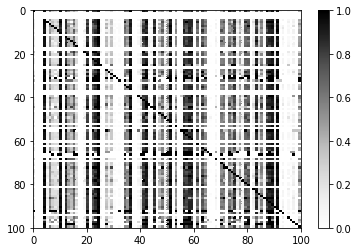

In [51]:
reg_idx = 30

# Start with the stronger correlation
selection_coefs = s1['1']
pdf = np.zeros((100, 100))
for i in range(100):
        # Loop over bootstraps and record indices of when 
        # the given feature is absent
        count = 0
        for b in range(100):            
            if selection_coefs[b, reg_idx, i] == 0:
                count += 1
                # record a count for all other features that are also absent
                for j in range(100):
                    if selection_coefs[b, reg_idx, j] == 0:
                        pdf[i, j] +=1 
                        
        if count > 0:
            pdf[i, :] *= 1/count

plt.pcolor(pdf, cmap = 'Greys', vmin = 0, vmax = 1)
plt.gca().invert_yaxis()
plt.colorbar()

In [41]:
np.diag(pdf)_

SyntaxError: invalid syntax (<ipython-input-41-948c6a72dc9d>, line 1)

In [42]:
np.diag(pdf)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
pdf[0, 0]

1.0

In [44]:
pdf[1, 1]

1.0

In [45]:
pdf[4, 4]

1.0

In [46]:
count

100